# Fraudulent Activities
## GOAL

E-commerce sites transfer a lot of money. This can lead to significant risks of fraudulent activities, such as the use of stolen credit cards, money laundering, etc.

Fortunately, Machine Learning can help us identify these fraudulent activities. All of the websites where you enter your payment information have a team that manages the risk of fraud through ML.

The goal of this challenge is to build a model that allows you to predict the probability of a fraudulent transaction.

**DESCRIPTION**

Company X does E-commerce and sells handmade clothing. Your goal is to build a model that can predict whether buying a piece of clothing should be considered a fraudulent transaction or not.

In [145]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [146]:
# Give some style to my texts

class style:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [147]:
# Import data
fraud_data = pd.read_csv('Fraud_Data2.csv')
IpAddress_to_Country_data = pd.read_csv('IpAddress_to_Country.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [148]:
# First look on features

print(style.BOLD + "Features description: \n" + style.END, fraud_data.describe(include='all'))
print()
print(style.BOLD + "initial dataset shape: \n" + style.END, fraud_data.shape)
print()
print(style.BOLD + "Features types: \n" + style.END, fraud_data.dtypes)
print()
print(style.BOLD + "Missing values: \n" + style.END, fraud_data.isnull().any())
print()

Features description: 
               user_id          signup_time        purchase_time  \
count   151112.000000               151112               151112   
unique            NaN               151112               150679   
top               NaN  2015-04-27 12:31:10  2015-09-10 09:04:53   
freq              NaN                    1                    3   
mean    200171.040970                  NaN                  NaN   
std     115369.285024                  NaN                  NaN   
min          2.000000                  NaN                  NaN   
25%     100642.500000                  NaN                  NaN   
50%     199958.000000                  NaN                  NaN   
75%     300054.000000                  NaN                  NaN   
max     400000.000000                  NaN                  NaN   

        purchase_value      device_id  source browser     sex            age  \
count    151112.000000         151112  151112  151112  151112  151112.000000   
unique     

In [149]:
# First look on features

print(style.BOLD + "Features description: \n" + style.END, IpAddress_to_Country_data.describe(include='all'))
print()
print(style.BOLD + "initial dataset shape: \n" + style.END, IpAddress_to_Country_data.shape)
print()
print(style.BOLD + "Features types: \n" + style.END, IpAddress_to_Country_data.dtypes)
print()
print(style.BOLD + "Missing values: \n" + style.END, IpAddress_to_Country_data.isnull().any())
print()

Features description: 
         lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN                     NaN  United States
freq                       NaN                     NaN          46868
mean              2.724532e+09            2.724557e+09            NaN
std               8.975215e+08            8.974979e+08            NaN
min               1.677722e+07            1.677747e+07            NaN
25%               1.919930e+09            1.920008e+09            NaN
50%               3.230887e+09            3.230888e+09            NaN
75%               3.350465e+09            3.350466e+09            NaN
max               3.758096e+09            3.758096e+09            NaN

initial dataset shape: 
 (138846, 3)

Features types: 
 lower_bound_ip_address    float64
upper_bound_ip_address      int64
country    

In [150]:
# fraud_data = pd.concat([fraud_data, pd.DataFrame(liste, columns=['ip_address_country'])], axis=1)
fraud_data.shape

(151112, 12)

In [151]:
dataset2 = pd.DataFrame(fraud_data)
dataset2.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,United States
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,Canada


In [152]:
dataset2.ip_address_country.isnull().sum()

21966

In [153]:
dataset2.ip_address_country = dataset2.ip_address_country.fillna('Unkown')

In [154]:
dataset2 = dataset2.drop(['user_id', 'device_id', 'signup_time', 'purchase_time', 'ip_address', 'ip_address_country'], axis=1)
dataset2

,purchase_value,source,browser,sex,age,class
0,34,SEO,Chrome,M,39,0
1,16,Ads,Chrome,F,53,0
2,15,SEO,Opera,M,53,1
3,44,SEO,Safari,M,41,0
4,39,Ads,Safari,M,45,0
...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1
151108,35,SEO,Safari,M,32,0
151109,40,SEO,IE,F,26,0
151110,46,SEO,Chrome,M,37,0


# Preprocessing for baseline model

In [155]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["purchase_value", "source", "browser", "sex", "age"]
target_variable = "class"

X = dataset2.loc[:,features_list]
Y = dataset2.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

X :
   purchase_value source browser sex  age
0              34    SEO  Chrome   M   39
1              16    Ads  Chrome   F   53
2              15    SEO   Opera   M   53
3              44    SEO  Safari   M   41
4              39    Ads  Safari   M   45


In [156]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['purchase_value', 'age']  at positions  [0, 4]
Found categorical features  ['source', 'browser', 'sex']  at positions  [1, 2, 3]


In [157]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [158]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")


Convert pandas DataFrames to numpy arrays...
...Done


In [159]:
X_train

array([[21, 'Direct', 'Safari', 'F', 39],
       [20, 'SEO', 'Safari', 'M', 25],
       [34, 'Ads', 'Safari', 'M', 26],
       ...,
       [20, 'Ads', 'FireFox', 'F', 34],
       [35, 'SEO', 'Safari', 'M', 37],
       [58, 'Ads', 'Safari', 'F', 27]], dtype=object)

In [160]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")

print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[[21 'Direct' 'Safari' 'F' 39]
 [20 'SEO' 'Safari' 'M' 25]
 [34 'Ads' 'Safari' 'M' 26]
 [61 'SEO' 'IE' 'M' 29]
 [57 'Ads' 'IE' 'F' 24]]
...Done
[[ 1.          0.          0.          0.          0.          1.
   0.         -0.86792715  0.67834581]
 [ 0.          1.          0.          0.          0.          1.
   1.         -0.9224847  -0.94523103]
 [ 0.          0.          0.          0.          0.          1.
   1.         -0.15867899 -0.82926125]
 [ 0.          1.          0.          1.          0.          0.
   1.          1.31437489 -0.48135193]
 [ 0.          0.          0.          1.          0.          0.
   0.          1.09614469 -1.0612008 ]]


# Basic Logistic Regression

In [161]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [162]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [163]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[[69 'Ads' 'IE' 'M' 32]
 [35 'SEO' 'IE' 'M' 31]
 [16 'Ads' 'IE' 'M' 35]
 [42 'Ads' 'Chrome' 'M' 29]
 [30 'SEO' 'Opera' 'F' 35]]
...Done
[[ 0.          0.          0.          1.          0.          0.
   1.          1.7508353  -0.13344261]
 [ 0.          1.          0.          1.          0.          0.
   1.         -0.10412144 -0.24941238]
 [ 0.          0.          0.          1.          0.          0.
   1.         -1.14071491  0.21446671]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.27778142 -0.48135193]
 [ 0.          1.          0.          0.          1.          0.
   0.         -0.37690919  0.21446671]]


In [164]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [165]:
print("Accuracy on train set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on train set :  0.9063521081322535
Accuracy on test set :  0.9063627039010026


In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[109568      0]
 [ 11321      0]]

Confusion matrix on test set : 
[[27393     0]
 [ 2830     0]]



In [168]:
from sklearn.metrics import f1_score

In [169]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.0
f1_score on test set :  0.0


### Conclusion

With these features and a basic Logistic Regression, results are not good because the model predicts all transactions are not fraudulent. This error comes from a imbalance dataset, there are 14151 fraudulent activities for 136961 non-fraudulent (about 9%).

# Random forest avec GridSearchCV

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, Y_train)

print("accuracy train :", rf_classifier.score(X_train, Y_train))
print("accuracy test :", rf_classifier.score(X_test, Y_test))


accuracy train : 0.9446351611809181
accuracy test : 0.921218939218476


In [171]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(X_train, Y_train)

print("accuracy train :", rf_classifier.score(X_train, Y_train))
print("accuracy test :", rf_classifier.score(X_test, Y_test))


accuracy train : 0.9438658604174077
accuracy test : 0.9192336961916421


In [172]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": [58,59]}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1).fit(X_train, Y_train)

In [173]:
classifier.best_params_

{'n_estimators': 58}

In [174]:
classifier.best_estimator_.score(X_test, Y_test)

0.92145055090494

In [175]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [176]:
print("Accuracy on train set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on train set :  0.9447757860516672
Accuracy on test set :  0.92145055090494


In [177]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[107390   2178]
 [  4498   6823]]

Confusion matrix on test set : 
[[26463   930]
 [ 1444  1386]]



In [178]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.6714890266706034
f1_score on test set :  0.5386708122813836


#### Conclusion

With these features and a Random Forest, results are much better than previous results. Precision for test results is about 90%. Improving F1_score would be the next step because it is not excellent.

# Features improvement

In [179]:
dataset3 = pd.DataFrame(fraud_data)
dataset3

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,United States
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,Unkown
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Unkown
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Unkown
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,Unkown


In [180]:
dataset3 = dataset3.drop(['user_id', 'device_id', 'signup_time', 'purchase_time', 'ip_address'], axis=1)
dataset3

,purchase_value,source,browser,sex,age,class,ip_address_country
0,34,SEO,Chrome,M,39,0,Japan
1,16,Ads,Chrome,F,53,0,United States
2,15,SEO,Opera,M,53,1,United States
3,44,SEO,Safari,M,41,0,United States
4,39,Ads,Safari,M,45,0,Canada
...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1,Unkown
151108,35,SEO,Safari,M,32,0,Unkown
151109,40,SEO,IE,F,26,0,Unkown
151110,46,SEO,Chrome,M,37,0,Unkown


<function matplotlib.pyplot.show(*args, **kw)>

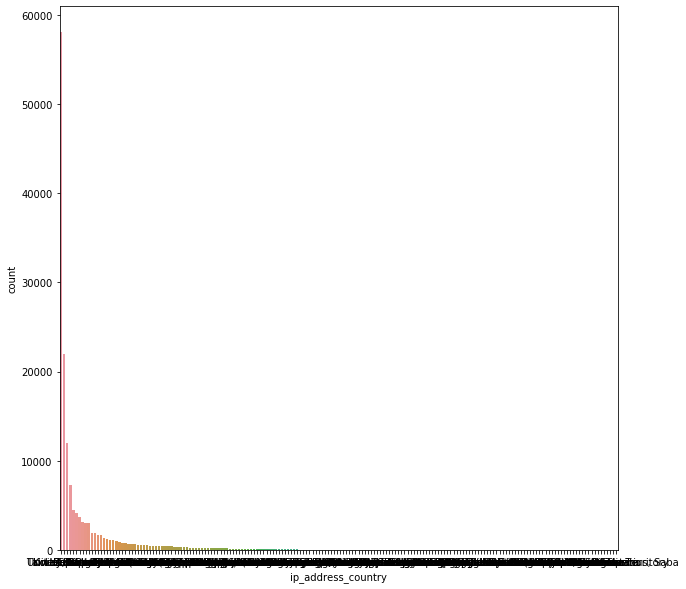

In [181]:
plt.figure(figsize=(10,10))
sns.countplot(dataset3.ip_address_country, order = dataset3['ip_address_country'].value_counts().index)
plt.show

In [182]:
dataset2['class'].sum()*100/len(dataset2['class'])

9.364577267192546

In [183]:
dataset3.groupby('ip_address_country')['class'].sum().sort_values(ascending=False).head(11)

ip_address_country
United States        5490
Unkown               2094
China                1124
Japan                 678
United Kingdom        397
Korea Republic of     377
Germany               312
France                312
Canada                285
Brazil                276
Italy                 178
Name: class, dtype: int64

In [184]:
# 80% of total countries
dataset3.ip_address_country.value_counts().sort_values(ascending=False).head(11).index

Index(['United States', 'Unkown', 'China', 'Japan', 'United Kingdom',
       'Korea Republic of', 'Germany', 'France', 'Canada', 'Brazil', 'Italy'],
      dtype='object')

In [185]:
# df = df[df[column].between(vmin, vmax)]
column = 'ip_address_country'
valeurs = ['United States', 'Unkown', 'China']
dataset3 = dataset3[dataset3[column].isin(valeurs)]
# ,'Japan', 'United Kingdom', 'Korea Republic of', 'Germany', 'France', 'Canada', 'Brazil', 'Italy'

In [186]:
dataset3

,purchase_value,source,browser,sex,age,class,ip_address_country
1,16,Ads,Chrome,F,53,0,United States
2,15,SEO,Opera,M,53,1,United States
3,44,SEO,Safari,M,41,0,United States
5,42,Ads,Chrome,M,18,0,United States
6,11,Ads,Chrome,F,19,0,China
...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1,Unkown
151108,35,SEO,Safari,M,32,0,Unkown
151109,40,SEO,IE,F,26,0,Unkown
151110,46,SEO,Chrome,M,37,0,Unkown


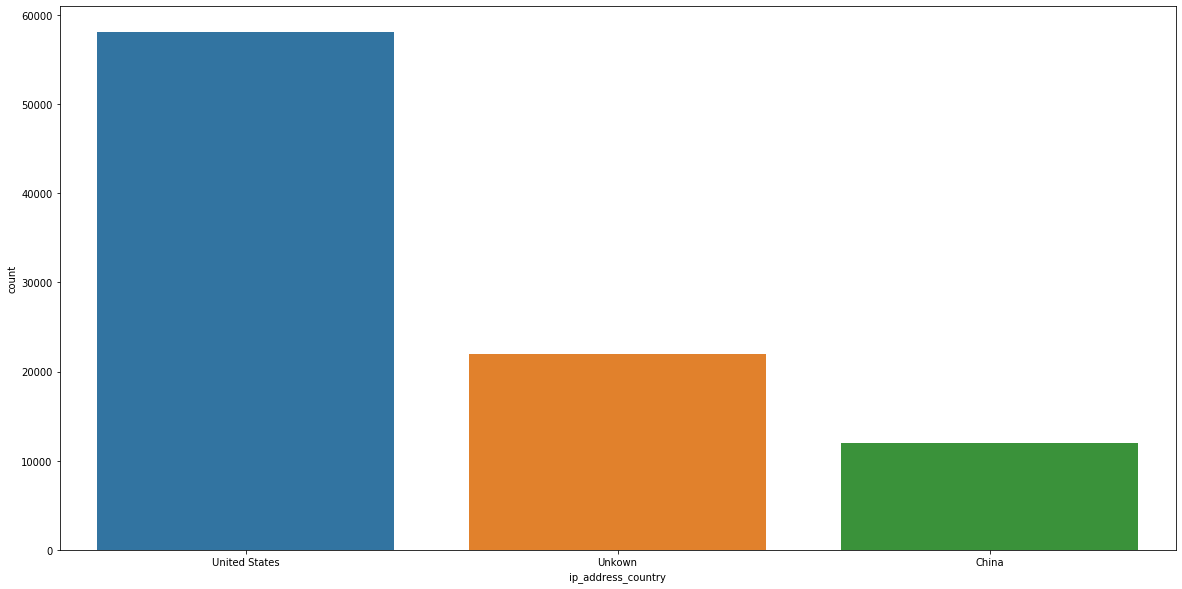

In [187]:
plt.figure(figsize=(20,10))
sns.countplot(dataset3.ip_address_country, order = dataset3['ip_address_country'].value_counts().index)
plt.show()

# Preprocessing for model2

In [188]:
# Only with US, Unknown and China
dataset3

,purchase_value,source,browser,sex,age,class,ip_address_country
1,16,Ads,Chrome,F,53,0,United States
2,15,SEO,Opera,M,53,1,United States
3,44,SEO,Safari,M,41,0,United States
5,42,Ads,Chrome,M,18,0,United States
6,11,Ads,Chrome,F,19,0,China
...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1,Unkown
151108,35,SEO,Safari,M,32,0,Unkown
151109,40,SEO,IE,F,26,0,Unkown
151110,46,SEO,Chrome,M,37,0,Unkown


In [189]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["purchase_value", "source", "browser", "sex", "age", "ip_address_country"]
target_variable = "class"

X = dataset3.loc[:,features_list]
Y = dataset3.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
1    0
2    1
3    0
5    0
6    0
Name: class, dtype: int64

X :
   purchase_value source browser sex  age ip_address_country
1              16    Ads  Chrome   F   53      United States
2              15    SEO   Opera   M   53      United States
3              44    SEO  Safari   M   41      United States
5              42    Ads  Chrome   M   18      United States
6              11    Ads  Chrome   F   19              China


In [190]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['purchase_value', 'age']  at positions  [0, 4]
Found categorical features  ['source', 'browser', 'sex', 'ip_address_country']  at positions  [1, 2, 3, 5]


In [191]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [192]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")



Convert pandas DataFrames to numpy arrays...
...Done


In [193]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print()



Encoding categorical features and standardizing numerical features...

[[9 'Direct' 'IE' 'M' 27 'United States']
 [23 'Direct' 'Opera' 'M' 35 'United States']
 [72 'Ads' 'IE' 'F' 38 'United States']
 [66 'Ads' 'Chrome' 'F' 36 'China']
 [43 'Ads' 'IE' 'F' 34 'China']]
...Done



In [194]:
print(X_train[0:5,:])

[[ 1.          0.          0.          1.          0.          0.
   1.          1.          0.         -1.5274695  -0.71396908]
 [ 1.          0.          0.          0.          1.          0.
   1.          1.          0.         -0.76443341  0.21329358]
 [ 0.          0.          0.          1.          0.          0.
   0.          1.          0.          1.90619293  0.56101707]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.57917746  0.32920141]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.32561816  0.09738575]]


# RANDOM FOREST

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[[27 'SEO' 'Safari' 'F' 19 'United States']
 [33 'SEO' 'Safari' 'M' 42 'United States']
 [40 'Direct' 'Safari' 'M' 32 'Unkown']
 [12 'SEO' 'Chrome' 'M' 23 'United States']
 [34 'Ads' 'IE' 'M' 21 'China']]
...Done
[[ 0.          1.          0.          0.          0.          1.
   0.          1.          0.         -0.54642309 -1.64123173]
 [ 0.          1.          0.          0.          0.          1.
   1.          1.          0.         -0.21940763  1.0246484 ]
 [ 1.          0.          0.          0.          0.          1.
   1.          0.          1.          0.16211042 -0.13442992]
 [ 0.          1.          0.          0.          0.          0.
   1.          1.          0.         -1.36396177 -1.1776004 ]
 [ 0.          0.          0.          1.          0.          0.
   1.          0.          0.         -0.16490505 -1.40941607]]


In [197]:
# Predictions on train set
print("Predictions on test set...")
Y_train_pred = rf_classifier.predict(X_train)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [198]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = rf_classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 1 ... 0 0 0]



In [199]:
print("accuracy train :", rf_classifier.score(X_train, Y_train))
print("accuracy test :", rf_classifier.score(X_test, Y_test))

accuracy train : 0.9611363080850601
accuracy test : 0.9068491662593015


In [200]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[65706   997]
 [ 1865  5074]]

Confusion matrix on test set : 
[[16015   627]
 [ 1088   681]]



In [201]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.7800153727901614
f1_score on test set :  0.44263893402664933


# RANDOM AVEC GRIDSEARCHCV

In [202]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50)}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1).fit(X_train, Y_train)

In [203]:
classifier.best_params_

{'n_estimators': 44}

In [204]:
classifier.best_estimator_.score(X_test, Y_test)

0.9073380044538591

In [205]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)


In [206]:
print("accuracy train :", rf_classifier.score(X_train, Y_train))
print("accuracy test :", rf_classifier.score(X_test, Y_test))

accuracy train : 0.9611363080850601
accuracy test : 0.9068491662593015


In [207]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[65806   897]
 [ 1748  5191]]

Confusion matrix on test set : 
[[16020   622]
 [ 1084   685]]



In [208]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.7969601596683811
f1_score on test set :  0.4453836150845254


#### Conclusion

With these new features and a Random Forest, results are not very interested because the model is over-fitting. All results are very good on train dataset but bad on test dataset.

I think keeping only 3 countries is not a good choice, the previous model is better. Using the two signup_time and purchase_time features could give some good results, and particularly the delta time between the signup time and the purchase time.